In [5]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Import the time library and the datetime module from the datetime library.
import time
from datetime import datetime

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -100.000, high = 100.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

608

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record coutn.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | qaanaaq
Processing Record 2 of Set 1 | codrington
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | mahebourg
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | cidreira
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | anloga
Processing Record 9 of Set 1 | san andres
Processing Record 10 of Set 1 | maryville
Processing Record 11 of Set 1 | bonito
Processing Record 12 of Set 1 | conceicao do araguaia
Processing Record 13 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 14 of Set 1 | rocha
Processing Record 15 of Set 1 | matam
Processing Record 16 of Set 1 | abu samrah
Processing Record 17 of Set 1 | tomaszow mazowiecki
Processing Record 18 of Set 1 | cockburn town
Processing Record 19 of Set 1 | kruisfontein
Processing Record 20 of Set 1 | nanortalik
Processing Record 21 of Set 1 | antalaha
Processing Record 22 of S

Processing Record 37 of Set 4 | malanje
Processing Record 38 of Set 4 | saint-pierre
Processing Record 39 of Set 4 | shahreza
Processing Record 40 of Set 4 | disraeli
Processing Record 41 of Set 4 | cabedelo
Processing Record 42 of Set 4 | louisbourg
City not found. Skipping...
Processing Record 43 of Set 4 | pionerskiy
Processing Record 44 of Set 4 | reo
Processing Record 45 of Set 4 | natchitoches
Processing Record 46 of Set 4 | vestmannaeyjar
Processing Record 47 of Set 4 | holly hill
Processing Record 48 of Set 4 | georgiyevka
Processing Record 49 of Set 4 | akdepe
Processing Record 50 of Set 4 | puri
Processing Record 1 of Set 5 | gravdal
Processing Record 2 of Set 5 | borama
City not found. Skipping...
Processing Record 3 of Set 5 | mugla
Processing Record 4 of Set 5 | olinda
Processing Record 5 of Set 5 | ikwiriri
Processing Record 6 of Set 5 | eyrarbakki
Processing Record 7 of Set 5 | yar-sale
Processing Record 8 of Set 5 | anastacio
Processing Record 9 of Set 5 | el viejo
Proc

Processing Record 28 of Set 8 | panjakent
Processing Record 29 of Set 8 | bari
Processing Record 30 of Set 8 | mezen
Processing Record 31 of Set 8 | coari
Processing Record 32 of Set 8 | mitsamiouli
Processing Record 33 of Set 8 | krasnoselkup
Processing Record 34 of Set 8 | resistencia
Processing Record 35 of Set 8 | grindavik
Processing Record 36 of Set 8 | bakchar
Processing Record 37 of Set 8 | gubkinskiy
Processing Record 38 of Set 8 | ust-ishim
Processing Record 39 of Set 8 | volkermarkt
City not found. Skipping...
Processing Record 40 of Set 8 | pailitas
Processing Record 41 of Set 8 | cap-chat
Processing Record 42 of Set 8 | klaksvik
Processing Record 43 of Set 8 | bara
Processing Record 44 of Set 8 | verkhnyaya inta
Processing Record 45 of Set 8 | kikwit
Processing Record 46 of Set 8 | sao goncalo do amarante
Processing Record 47 of Set 8 | turayf
Processing Record 48 of Set 8 | klyavlino
Processing Record 49 of Set 8 | mecca
Processing Record 50 of Set 8 | tamandare
Processin

Processing Record 16 of Set 12 | kargasok
Processing Record 17 of Set 12 | fohnsdorf
Processing Record 18 of Set 12 | santa cruz de tenerife
Processing Record 19 of Set 12 | carbondale
Processing Record 20 of Set 12 | kaduqli
Processing Record 21 of Set 12 | cap malheureux
Processing Record 22 of Set 12 | umba
Processing Record 23 of Set 12 | lampang
Processing Record 24 of Set 12 | mount darwin
Processing Record 25 of Set 12 | saryozek
Processing Record 26 of Set 12 | mamallapuram
Processing Record 27 of Set 12 | scarborough
Processing Record 28 of Set 12 | gracanica
Processing Record 29 of Set 12 | caxito
Processing Record 30 of Set 12 | arenapolis
Processing Record 31 of Set 12 | saint-louis
Processing Record 32 of Set 12 | hounde
Processing Record 33 of Set 12 | aksarka
Processing Record 34 of Set 12 | trelew
Processing Record 35 of Set 12 | dhanaura
Processing Record 36 of Set 12 | maniitsoq
Processing Record 37 of Set 12 | paamiut
Processing Record 38 of Set 12 | wattegama
Proces

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Qaanaaq,77.4840,-69.3632,-8.25,70,0,6.71,GL,2021-11-21 03:32:04
1,Codrington,-38.2667,141.9667,60.24,61,19,14.07,AU,2021-11-21 03:32:05
2,Ushuaia,-54.8000,-68.3000,33.46,93,90,31.07,AR,2021-11-21 03:29:59
3,Mahebourg,-20.4081,57.7000,79.25,78,40,9.22,MU,2021-11-21 03:32:05
4,Busselton,-33.6500,115.3333,83.08,56,98,10.22,AU,2021-11-21 03:32:05
5,Cidreira,-30.1811,-50.2056,64.13,78,0,15.61,BR,2021-11-21 03:32:06
6,Bredasdorp,-34.5322,20.0403,63.28,81,100,14.32,ZA,2021-11-21 03:32:06
7,Anloga,5.7947,0.8973,80.82,81,35,9.42,GH,2021-11-21 03:32:06
8,San Andres,12.5847,-81.7006,82.42,83,40,10.36,CO,2021-11-21 03:32:06
9,Maryville,35.7565,-83.9705,45.09,71,20,1.99,US,2021-11-21 03:31:06


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Qaanaaq,GL,2021-11-21 03:32:04,77.4840,-69.3632,-8.25,70,0,6.71
1,Codrington,AU,2021-11-21 03:32:05,-38.2667,141.9667,60.24,61,19,14.07
2,Ushuaia,AR,2021-11-21 03:29:59,-54.8000,-68.3000,33.46,93,90,31.07
3,Mahebourg,MU,2021-11-21 03:32:05,-20.4081,57.7000,79.25,78,40,9.22
4,Busselton,AU,2021-11-21 03:32:05,-33.6500,115.3333,83.08,56,98,10.22
5,Cidreira,BR,2021-11-21 03:32:06,-30.1811,-50.2056,64.13,78,0,15.61
6,Bredasdorp,ZA,2021-11-21 03:32:06,-34.5322,20.0403,63.28,81,100,14.32
7,Anloga,GH,2021-11-21 03:32:06,5.7947,0.8973,80.82,81,35,9.42
8,San Andres,CO,2021-11-21 03:32:06,12.5847,-81.7006,82.42,83,40,10.36
9,Maryville,US,2021-11-21 03:31:06,35.7565,-83.9705,45.09,71,20,1.99


In [13]:
# Create the output file (CSV)
output_data_file = "Weather_Data/cities.csv"
# Export the City_Data_ into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract the relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

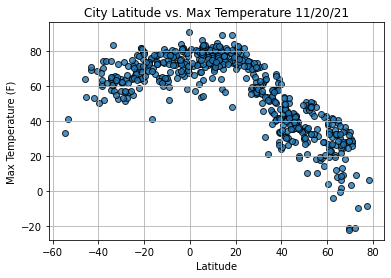

In [15]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor = "black", linewidths = 1, marker = "o",
           alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Weather_Data/Fig1.png")

# Show plot.
plt.show()

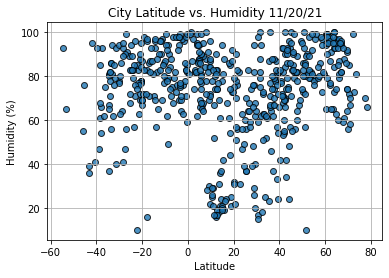

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor = "black", linewidths = 1, marker = "o",
            alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Weather_Data/Fig2.png")

# Show plot.
plt.show()

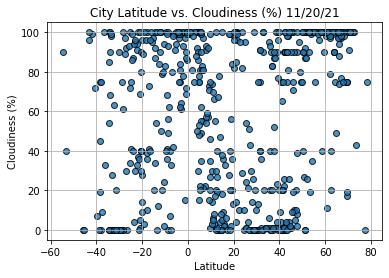

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor = "black", linewidths = 1, marker = "o",
            alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Weather_Data/Fig3.png")

# Show plot.
plt.show()

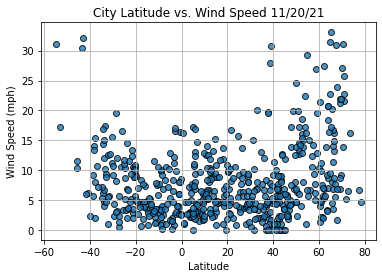

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor = "black", linewidths = 1, marker = "o",
            alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Weather_Data/Fig4.png")

# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize = 15, color = "red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()
    

In [20]:
index13 = city_data_df.loc[13]
index13

City                        Matam
Country                        SN
Date          2021-11-21 03:32:07
Lat                       15.6175
Lng                      -13.3303
Max Temp                    81.54
Humidity                       19
Cloudiness                      3
Wind Speed                    8.9
Name: 13, dtype: object

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Qaanaaq,GL,2021-11-21 03:32:04,77.4840,-69.3632,-8.25,70,0,6.71
7,Anloga,GH,2021-11-21 03:32:06,5.7947,0.8973,80.82,81,35,9.42
8,San Andres,CO,2021-11-21 03:32:06,12.5847,-81.7006,82.42,83,40,10.36
9,Maryville,US,2021-11-21 03:31:06,35.7565,-83.9705,45.09,71,20,1.99
13,Matam,SN,2021-11-21 03:32:07,15.6175,-13.3303,81.54,19,3,8.90


In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]                                 

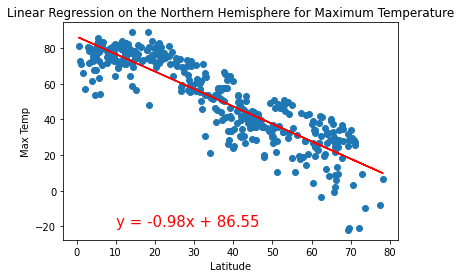

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,-20))

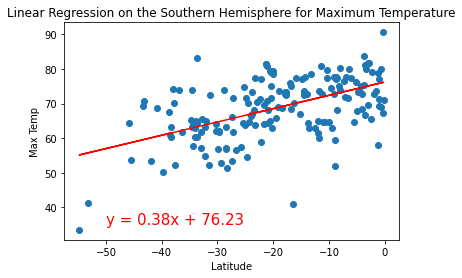

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,35))

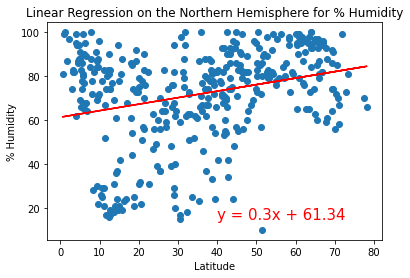

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,15))

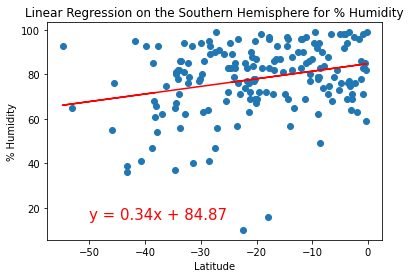

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

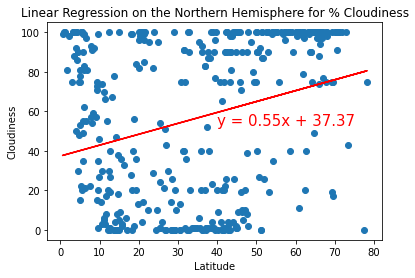

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', 'Cloudiness',(40,53))

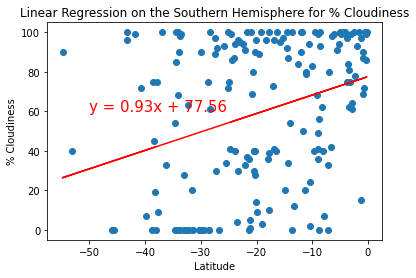

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))